# Square Root Diffusion

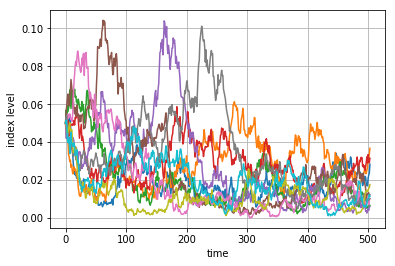

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Simulation():
    
    def __init__(self, S0, sigma, T, kappa, theta):
        
        self.S0 = S0
        self.sigma = sigma
        self.T = T
        #I is the number of simulations that should be ran
        self.I = 10000
        #kappa is the mean reversion factor
        self.kappa = kappa
        #the long term mean of the process
        self.theta = theta
        
    def square_root_monte_carlo(self):
 
        n_steps = int(self.T * 252)
        dt = self.T / n_steps
        S = np.zeros((n_steps, self.I))
        S[0] = self.S0
        
        for t in range(1, n_steps):
            Z = np.random.standard_normal(self.I)
            S[t] = S[t - 1] + self.kappa * (self.theta - np.maximum(S[t-1], 0)) * dt \
            + self.sigma * np.sqrt(np.maximum(S[t-1], 0)) * np.sqrt(dt)*Z
        S = np.maximum(S,0.0)
        return S

if __name__ == '__main__':
    #euler discretiztion for square root diffusion

    
    sim = Simulation(.05, .25, 2.,3,.02)

    
    X = sim.square_root_monte_carlo()
    plt.plot(X[:,:10], lw = 1.5)
    plt.xlabel('time')
    plt.ylabel('index level')
    plt.grid(True)